In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, request, jsonify
import pickle
import numpy as np
import streamlit as st
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
dataset = pd.read_csv("/content/adult 3.csv")

In [ ]:
print("Column names:", dataset.columns)

Column names: Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
dataset.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
dataset.shape

(48842, 15)

In [ ]:
print(dataset.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [ ]:
print("Statistics of the columns:")
dataset.describe()

Statistics of the columns:


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
dataset.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(dataset.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
# Replace '?' with NaN or a placeholder in categorical columns
dataset.replace('?', np.nan, inplace=True)

# Check nulls
dataset.isna().sum()

# Impute missing values (mode for categorical)
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Drop duplicates if any
dataset.drop_duplicates(inplace=True)

/tmp/ipython-input-135-2963024722.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [ ]:
dataset.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
dataset.shape

(48789, 15)

In [ ]:
print(dataset.gender.value_counts())

gender
Male      32614
Female    16175
Name: count, dtype: int64


In [ ]:
print(dataset.relationship.value_counts())

relationship
Husband           19703
Not-in-family     12557
Own-child          7568
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64


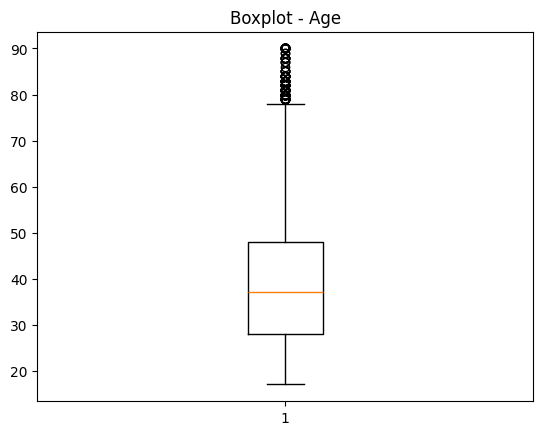

In [ ]:
plt.boxplot(dataset['age'])
plt.title("Boxplot - Age")
plt.show()

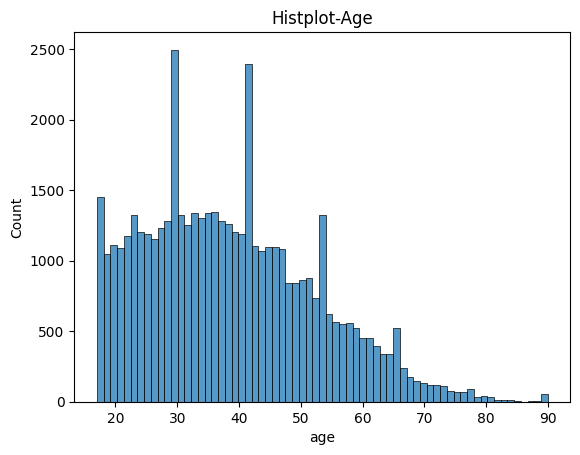

In [ ]:
sns.histplot(x="age", data=dataset)
plt.title("Histplot-Age")
plt.show()

In [ ]:
# Removed outlier filtering as imputation will be handled in the pipeline
# dataset = dataset[(dataset['age']<=75) & (dataset['age']>=18)]
# dataset = dataset[(dataset['educational-num'] >= 5) & (dataset['educational-num'] <= 16)]

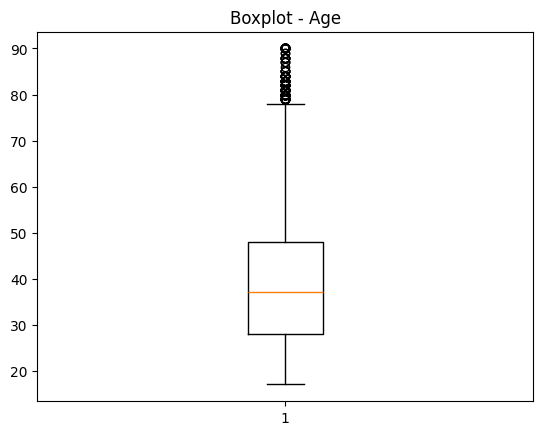

In [ ]:
plt.boxplot(dataset['age'])
plt.title("Boxplot - Age")
plt.show()

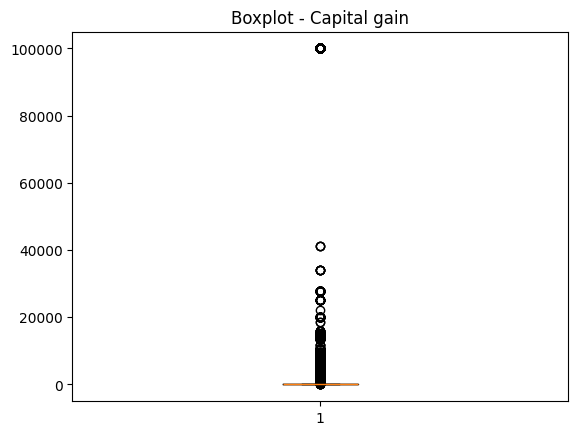

In [ ]:
plt.boxplot(dataset['capital-gain'])
plt.title("Boxplot - Capital gain")
plt.show()

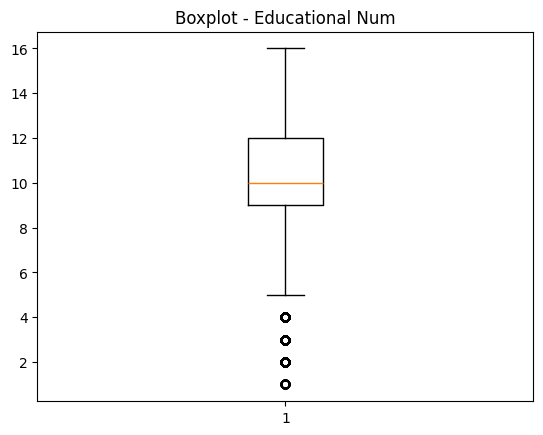

In [ ]:
plt.boxplot(dataset['educational-num'])
plt.title("Boxplot - Educational Num")
plt.show()

In [ ]:
# Removed outlier filtering as imputation will be handled in the pipeline
# dataset=dataset[(dataset['educational-num']<=16)&(dataset['educational-num']>=5)]
# plt.boxplot(dataset['educational-num'])
# plt.show()

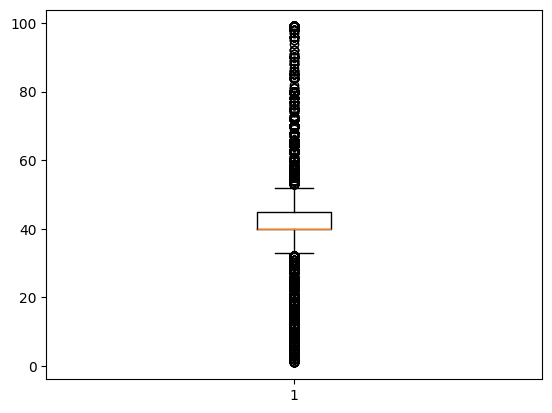

In [ ]:
plt.boxplot(dataset['hours-per-week'])
plt.show()

In [ ]:
dataset.shape

(48789, 15)

In [ ]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


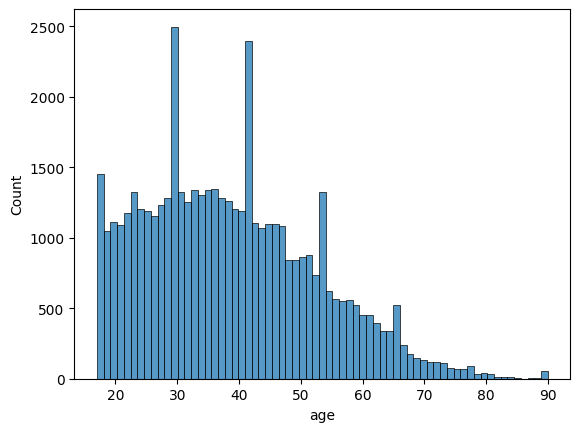

In [ ]:
sns.histplot(x="age", data=dataset)
plt.show()

In [ ]:
encoder = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    dataset[col] = encoder.fit_transform(dataset[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
dataset['workclass']=encoder.fit_transform(dataset['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
dataset['marital-status']=encoder.fit_transform(dataset['marital-status'])   #3 categories 0, 1, 2
dataset['occupation']=encoder.fit_transform(dataset['occupation'])
dataset['relationship']=encoder.fit_transform(dataset['relationship'])      #5 categories  0, 1, 2, 3, 4
dataset['race']=encoder.fit_transform(dataset['race'])
dataset['gender']=encoder.fit_transform(dataset['gender'])    #2 catogories     0, 1
dataset['native-country']=encoder.fit_transform(dataset['native-country'])

In [ ]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,38,>50K
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,3,103497,Some-college,10,4,9,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,38,<=50K
48838,40,3,154374,HS-grad,9,2,6,0,4,1,0,0,40,38,>50K
48839,58,3,151910,HS-grad,9,6,0,4,4,0,0,0,40,38,<=50K
48840,22,3,201490,HS-grad,9,4,0,3,4,1,0,0,20,38,<=50K


In [ ]:
x = dataset.drop(columns=['income'])
y = dataset['income']
print("✅ Feature columns:", x.columns.tolist())

✅ Feature columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [ ]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain',
                'capital-loss', 'hours-per-week']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Drop rows with missing income
dataset.dropna(subset=['income'], inplace=True)

x = dataset.drop(columns=['income'])
y = dataset['income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Define correct columns based on your DataFrame
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain',
                'capital-loss', 'hours-per-week']

# Preprocessor with Imputers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ]
)

# Evaluate each model
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8474
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7360
        >50K       0.74      0.58      0.65      2398

    accuracy                           0.85      9758
   macro avg       0.81      0.76      0.78      9758
weighted avg       0.84      0.85      0.84      9758

RandomForest Accuracy: 0.8510
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7360
        >50K       0.74      0.61      0.67      2398

    accuracy                           0.85      9758
   macro avg       0.81      0.77      0.79      9758
weighted avg       0.85      0.85      0.85      9758

KNN Accuracy: 0.8316
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7360
        >50K       0.68      0.60      0.63      2398

    accuracy                           0.83      9758
   macro avg       0.78      0.75      0.

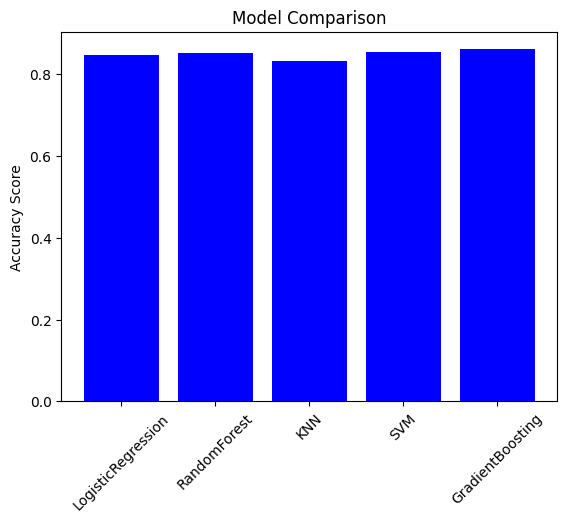

In [ ]:
plt.bar(results.keys(), results.values(), color='blue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Define correct columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain',
                'capital-loss', 'hours-per-week']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

results = {}
pipelines = {}

# Train and evaluate each model with preprocessing pipeline
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    pipelines[name] = pipe
    print(f"{name}: {acc:.4f}")

# Get best model pipeline
best_model_name = max(results, key=results.get)
best_pipeline = pipelines[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the entire pipeline including preprocessing
joblib.dump(best_pipeline, "model.pkl")
print("✅ Saved best model pipeline as model.pkl")

LogisticRegression: 0.8474
RandomForest: 0.8507
KNN: 0.8316
SVM: 0.8529
GradientBoosting: 0.8598

✅ Best model: GradientBoosting with accuracy 0.8598
✅ Saved best model pipeline as model.pkl


In [ ]:
%%writefile prediction.py
import streamlit as st
import pandas as pd
import joblib
import base64

# ========= Set background image =========
def set_bg(image_file):
    with open(image_file, "rb") as image:
        encoded = base64.b64encode(image.read()).decode()
    css = f"""
    <style>
    .stApp {{
        background-image: url('data:image/png;base64,{encoded}');
        background-size: cover;
        background-position: center;
        background-repeat: no-repeat;
    }}
    </style>
    """
    st.markdown(css, unsafe_allow_html=True)

set_bg("theme.png")  # replace with your image

# ========= Page config =========
st.set_page_config(page_title="Employee Salary Prediction", page_icon="💸", layout="wide")

# ========= Load trained model =========
model = joblib.load("model.pkl")

# ========= Header =========
st.markdown("""
    <h1 style='text-align: center; background: linear-gradient(90deg, #00C9FF, #92FE9D); padding: 20px; border-radius: 10px; color: black;'>
        💼 Employee Salary Prediction App
    </h1>
""", unsafe_allow_html=True)
st.markdown("### 📊 Predict Employee Salary")

# ========= Sidebar Inputs =========
with st.sidebar:
    st.header("📝 Input Employee Details")
    age = st.slider("Age", 18, 65, 24)
    fnlwgt = st.number_input("Final Weight", min_value=0, value=100000)
    education = st.selectbox("Education Level", [
        "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
    ])
    educational_num = st.slider("Education Num", 1, 16, 10)
    marital_status = st.selectbox("Marital Status", ["Never-married", "Married-civ-spouse", "Divorced", "Separated", "Widowed", "Married-spouse-absent"])
    occupation = st.selectbox("Occupation", ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"])
    relationship = st.selectbox("Relationship", ["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"])
    race = st.selectbox("Race", ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"])
    gender = st.selectbox("Gender", ["Male", "Female"])
    capital_gain = st.number_input("Capital Gain", min_value=0, value=0)
    capital_loss = st.number_input("Capital Loss", min_value=0, value=0)
    hours_per_week = st.slider("Hours per week", 1, 80, 40)
    native_country = st.selectbox("Native Country", ["United-States", "Mexico", "Philippines", "Germany", "Canada", "India", "Others"])
    workclass = st.selectbox("Workclass", ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"])

# ========= Input DataFrame =========
input_df = pd.DataFrame({
    'age': [age],
    'fnlwgt': [fnlwgt],
    'education': [education],
    'educational-num': [educational_num],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country],
    'workclass': [workclass]
})

st.write("🔎 **Input Data Preview**")
st.dataframe(input_df, use_container_width=True)

# ========= Prediction Button =========
if st.button("💡 Calculate Salary"):
    prediction = model.predict(input_df)
    st.success(f"✅ Predicted Salary Class: {prediction[0]}")

# ========= Batch Prediction =========
st.markdown("---")
st.markdown("📂 **Batch Prediction**")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("🔍 Uploaded Data Preview")
    st.dataframe(batch_data.head(), use_container_width=True)
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ **Predictions**")
    st.dataframe(batch_data.head(), use_container_width=True)
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("⬇️ Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting prediction.py


In [ ]:
!pip install streamlit pyngrok

In [ ]:
!ngrok config add-authtoken 30EVmV8nTjRjqdZeiNXWnIlgf0E_6A92JY23WKq1DSU7AFqr7

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def  run_streamlit():
    os.system('streamlit run prediction.py --server.port 8000')

thread = threading.Thread(target=run_streamlit)
thread.start()

In [ ]:
from pyngrok import ngrok
import time

# Wait a few seconds to make sure Streamlit started
time.sleep(5)

# Disconnect any existing ngrok tunnels
for tunnel in ngrok.get_tunnels():
    ngrok.disconnect(tunnel.public_url)

# Create a tunnel to the Streamlit port 8051
public_url = ngrok.connect(8000)
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://08576cd1ba7f.ngrok-free.app" -> "http://localhost:8000"
